Size of the training set: 100
Learned Parameters (bias, coefficient of x1, coefficient of x2): [4.08710464 0.99071359 2.99600565]
Bias: 0.09022069502897886
Variance: 24.927118880451935

Size of the training set: 200
Learned Parameters (bias, coefficient of x1, coefficient of x2): [4.08475383 0.99301266 2.99353625]
Bias: 0.08626788855137342
Variance: 26.209562969811113

Size of the training set: 300
Learned Parameters (bias, coefficient of x1, coefficient of x2): [4.09951313 0.99511036 2.9842148 ]
Bias: 0.09125182842996608
Variance: 27.795874521637277

Size of the training set: 400
Learned Parameters (bias, coefficient of x1, coefficient of x2): [4.08747761 0.99635734 2.98403705]
Bias: 0.08574975476450807
Variance: 28.874717345550554

Size of the training set: 500
Learned Parameters (bias, coefficient of x1, coefficient of x2): [4.09052738 0.99549773 2.9848731 ]
Bias: 0.0854652432151797
Variance: 29.799994020871292

Size of the training set: 600
Learned Parameters (bias, coefficient of 

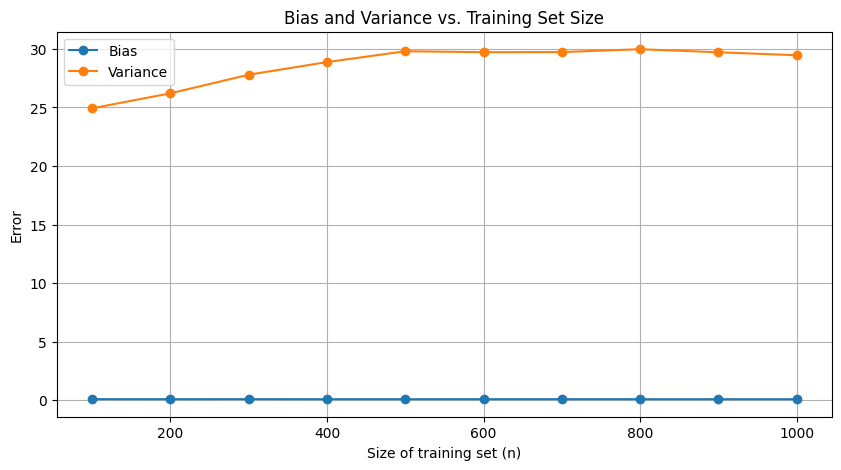

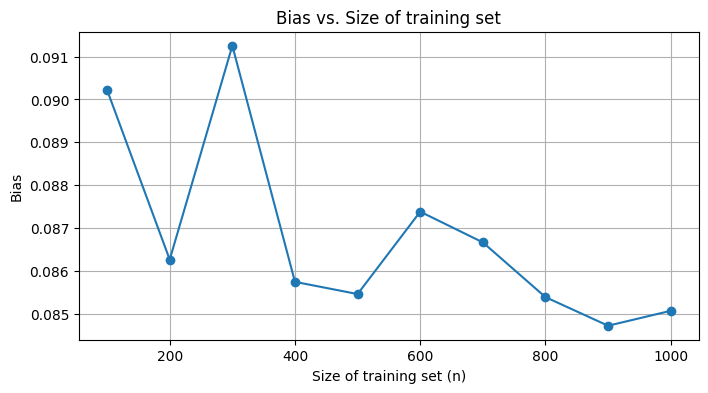

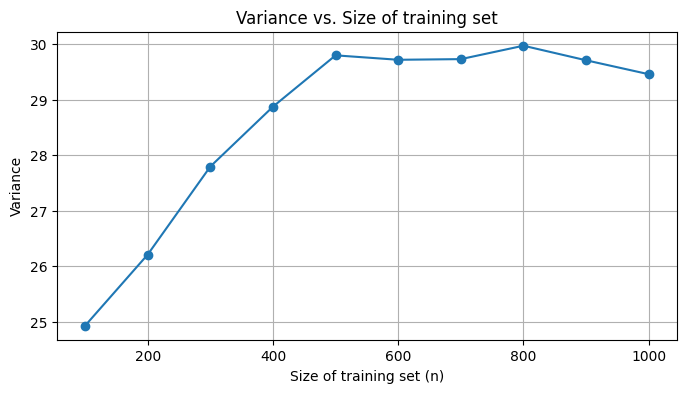

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rel bw variables
def true_relationship(x1, x2):
    return 4 + x1 + 3 * x2

#Generate data
np.random.seed(0)
n = 1000
x1 = np.random.uniform(1, 15, n)
x2 = np.random.uniform(2, 6, n)

# Adding noise
epsilon = np.random.normal(0, 0.3, n)

# Generating target variable
t = true_relationship(x1, x2) + epsilon

# Generate training sets and then perform linear regression
training_set_sizes = range(100, 1100, 100)
biases = []
variances = []

for n in training_set_sizes:
    x1_train = x1[:n]
    x2_train = x2[:n]
    t_train = t[:n]

    # Creating a feature matrix X
    X = np.column_stack((np.ones_like(x1_train), x1_train, x2_train))

    # linear regression
    theta = np.linalg.inv(X.T @ X) @ X.T @ t_train

    # predictions for the entire dataset (training as well as test)
    predictions = X @ theta

    # bias
    bias = np.mean((predictions - t_train) ** 2)
    biases.append(bias)

    # variance
    variance = np.mean((predictions - np.mean(predictions)) ** 2)
    variances.append(variance)

    print(f"Size of the training set: {n}")
    print(f"Learned Parameters (bias, coefficient of x1, coefficient of x2): {theta}")
    print(f"Bias: {bias}")
    print(f"Variance: {variance}\n")


test_set_size = 100
x1_test = np.random.uniform(1, 15, test_set_size)
x2_test = np.random.uniform(2, 6, test_set_size)
t_test = true_relationship(x1_test, x2_test) + np.random.normal(0, 0.3, test_set_size)

# feature matrix X for the test set
X_test = np.column_stack((np.ones_like(x1_test), x1_test, x2_test))

predictions = X_test @ theta

# bias on the test set
bias_test = np.mean((predictions - t_test) ** 2)

# variance on the test set
variance_test = np.mean((predictions - np.mean(predictions)) ** 2)

print(f"Bias for Test Set: {bias_test}")
print(f"Variance for Test Set: {variance_test}")

# Plotting bias and variance in a single graph
plt.figure(figsize=(10, 5))
plt.plot(training_set_sizes, biases, label='Bias', marker='o')
plt.plot(training_set_sizes, variances, label='Variance', marker='o')
plt.title("Bias and Variance vs. Training Set Size")
plt.xlabel("Size of training set (n)")
plt.ylabel("Error")
plt.legend()
plt.grid()

# Plotting bias seperately
plt.figure(figsize=(8, 4))
plt.plot(training_set_sizes, biases, label='Bias', marker='o')
plt.title("Bias vs. Size of training set")
plt.xlabel("Size of training set (n)")
plt.ylabel("Bias")
plt.grid()

# Plotting variance seperately
plt.figure(figsize=(8, 4))
plt.plot(training_set_sizes, variances, label='Variance', marker='o')
plt.title("Variance vs. Size of training set")
plt.xlabel("Size of training set (n)")
plt.ylabel("Variance")
plt.grid()

plt.show()